# 📊 Trader Performance vs Market Sentiment

Author: Hemang Krish  
Project Type: Exploratory Data Analysis (EDA)  
Tools Used: Python, Pandas, NumPy, Matplotlib, Seaborn  

This project investigates how trader profitability and behavior vary across different market sentiment regimes using the Fear & Greed Index.




## Objective
This project analyzes how trader performance varies across different market sentiment regimes using the Fear & Greed Index.

We investigate:
- Profitability across sentiment regimes
- Win rate differences
- Position sizing behavior
- Risk-adjusted performance

The goal is to understand whether trader behavior and outcomes are influenced by broader market sentiment.


## 🔬 Methodology

1. Cleaned and validated both datasets.
2. Aligned timestamps (UTC → IST).
3. Normalized both datasets to daily granularity.
4. Merged trades with sentiment classification.
5. Removed unmatched observations.
6. Evaluated performance across sentiment regimes.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_path = "/content/drive/MyDrive/Trader-Performance-Sentiment/data/"


In [3]:
#LOAD THE DATASETS
sentiment = pd.read_csv(base_path + "fear_greed_index.csv")
trades = pd.read_csv(base_path + "historical_data.csv")

# **PART A:  Data Preparation**

In [4]:
sentiment.shape


(2644, 4)

In [5]:
trades.shape

(211224, 16)

In [6]:
sentiment.info()
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

In [7]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## 📂 Dataset Overview

Two datasets were used:

1. **Historical Trades Data**
   - Contains individual trade records
   - Includes execution price, position size, PnL, side (Buy/Sell), timestamps, etc.

2. **Fear & Greed Index Data**
   - Daily market sentiment classification
   - Categories: Extreme Fear, Fear, Neutral, Greed, Extreme Greed

Trade data spans:
- May 2023 to May 2025

Sentiment data spans:
- February 2018 to May 2025


In [9]:
total_duplicates = trades.duplicated().sum()
print("Total number of duplicates:", total_duplicates)

Total number of duplicates: 0


In [10]:
total_duplicates_senti= sentiment.duplicated().sum()
print("Total number of duplicates:", total_duplicates_senti)

Total number of duplicates: 0


In [11]:
trades.isnull().sum().sort_values(ascending=False)


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [12]:
sentiment.isnull().sum()


,0
timestamp,0
value,0
classification,0
date,0


In [13]:
trades.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [14]:
trades['Timestamp'].head()


,Timestamp
0,1.730000e+12
1,1.730000e+12
2,1.730000e+12
3,1.730000e+12
4,1.730000e+12


In [15]:
# Converted sentiment timestamps from Unix format to datetime and extracted the daily date.


sentiment['timestamp'] = pd.to_datetime(sentiment['timestamp'], unit='s')

# Create date
sentiment['date'] = sentiment['timestamp'].dt.date

In [16]:
sentiment['date'].min(), sentiment['date'].max()


(datetime.date(2018, 2, 1), datetime.date(2025, 5, 2))

In [17]:
trades['Timestamp IST'].dtype


dtype('O')

In [18]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)


In [19]:
trades['Timestamp IST'].dtype


dtype('<M8[ns]')

In [20]:
trades['date'] = trades['Timestamp IST'].dt.normalize()


In [21]:
trades['date'].dtype


dtype('<M8[ns]')

In [22]:
sentiment['timestamp'] = pd.to_datetime(sentiment['timestamp'], utc=True)

sentiment['date'] = (
    sentiment['timestamp']
    .dt.tz_convert('Asia/Kolkata')
    .dt.tz_localize(None)
    .dt.normalize()
)


In [23]:
sentiment['date'].dtype


dtype('<M8[ns]')

In [24]:
len(set(trades['date']).intersection(set(sentiment['date'])))


479

In [25]:
df = trades.merge(
    sentiment[['date','classification']],
    on='date',
    how='left'
)


In [26]:
df['classification'].isnull().sum()


np.int64(6)

In [27]:
df = df.dropna(subset=['classification'])


## 🧹 Data Cleaning & Timestamp Alignment

Trade timestamps were recorded in IST format, while sentiment timestamps were in UTC.

To ensure accurate merging:
- Trade timestamps were converted to datetime format.
- Sentiment timestamps were converted to UTC and then aligned to IST.
- Both datasets were normalized to daily granularity.
- Timezone information was removed to prevent merge mismatches.

After alignment:
- 479 overlapping trading days were identified.
- Only 6 records lacked sentiment classification and were removed.


# **PART B: ANALYSIS**

## 📈 Performance Analysis by Sentiment

We evaluate performance using:

- Mean Closed PnL
- Median Closed PnL
- Win Rate (percentage of profitable trades)

Since many trades had zero PnL (partial closes or adjustments),
we also analyze non-zero PnL trades separately for cleaner insights.


In [28]:
#performance Comparison
df.groupby('classification')['Closed PnL'].mean()


,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


In [29]:
df.groupby('classification')['Closed PnL'].median()


,Closed PnL
classification,
Extreme Fear,0.0
Extreme Greed,0.0
Fear,0.0
Greed,0.0
Neutral,0.0


In [30]:
df_nonzero = df[df['Closed PnL'] != 0]


In [31]:
print("Mean:")
print(df_nonzero.groupby('classification')['Closed PnL'].mean())

print("\nMedian:")
print(df_nonzero.groupby('classification')['Closed PnL'].median())


Mean:
classification
Extreme Fear      71.027316
Extreme Greed    130.205309
Fear             112.625988
Greed             85.403927
Neutral           71.199993
Name: Closed PnL, dtype: float64

Median:
classification
Extreme Fear     6.388050
Extreme Greed    8.530740
Fear             6.350483
Greed            4.927600
Neutral          4.583458
Name: Closed PnL, dtype: float64


### 🔎 Observations

- Extreme Greed exhibits the highest average PnL.
- Fear regime also performs strongly.
- Median PnL across all trades was initially zero, indicating many non-closing or neutral trades.
- After filtering zero-PnL trades, clearer profitability patterns emerged.


In [32]:
df.groupby('classification').size()


,0
classification,
Extreme Fear,21400
Extreme Greed,39992
Fear,61837
Greed,50303
Neutral,37686


In [33]:
df.groupby('classification')['Size USD'].mean()


,Size USD
classification,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


---
# **PART C: Behavioral Analysis**
---


## 🧠 Behavioral Analysis

Beyond profitability, we analyze trader behavior across regimes:

- Trade frequency
- Long vs Short bias
- Average position size (Size USD)

This helps determine whether traders take more risk during certain sentiment conditions.


In [34]:
df.groupby(['classification','Side']).size().unstack()


Side,BUY,SELL
classification,,
Extreme Fear,10935,10465
Extreme Greed,17940,22052
Fear,30270,31567
Greed,24576,25727
Neutral,18969,18717


## 🎯 Win Rate Analysis

Win rate is defined as:

Closed PnL > 0

We analyze how frequently trades are profitable under different sentiment regimes.


In [35]:
df['win'] = df['Closed PnL'] > 0


In [36]:
df.groupby('classification')['win'].mean()


,win
classification,
Extreme Fear,0.370607
Extreme Greed,0.464943
Fear,0.420768
Greed,0.384828
Neutral,0.396991


### 🔎 Observations

- Extreme Greed has the highest win rate (~46%).
- Fear regime shows strong win probability (~42%).
- Extreme Fear has the lowest win rate (~37%).

This suggests momentum-driven environments provide higher trade success probability.


### 🔎 Observations

- Trade activity peaks during Fear periods.
- Position sizes are largest during Fear.
- Extreme Greed shows smaller average position sizes despite highest profitability.

This suggests traders deploy more capital during volatile regimes but achieve better efficiency during strong bullish momentum.


## ⚖ Risk-Adjusted Performance

To measure efficiency, we compute:

Risk-Adjusted Return = Mean PnL / Standard Deviation

This provides a simplified Sharpe-like metric to evaluate return per unit of volatility.


In [37]:
stats=df_nonzero.groupby('classification')['Closed PnL'].agg(['mean','std'])
print(stats)

                      mean          std
classification                         
Extreme Fear     71.027316  1628.408341
Extreme Greed   130.205309  1058.126139
Fear            112.625988  1344.778427
Greed            85.403927  1576.394764
Neutral          71.199993   743.212863


In [38]:
stats['risk_adj'] = stats['mean'] / stats['std']


In [39]:
stats.sort_values(by='risk_adj', ascending=False)


,mean,std,risk_adj
classification,,,
Extreme Greed,130.205309,1058.126139,0.123053
Neutral,71.199993,743.212863,0.095800
Fear,112.625988,1344.778427,0.083751
Greed,85.403927,1576.394764,0.054177
Extreme Fear,71.027316,1628.408341,0.043618


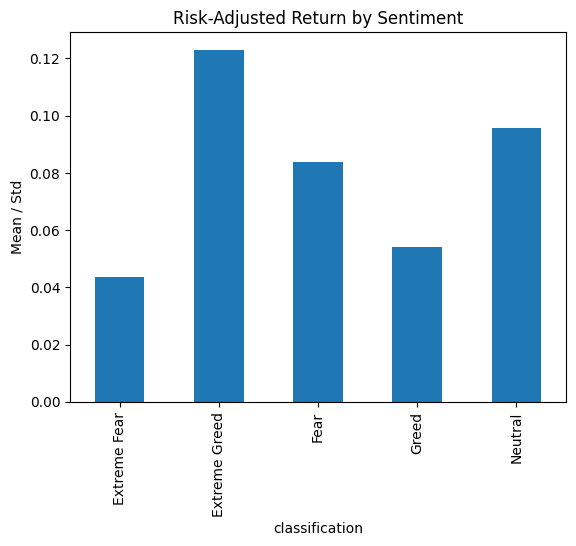

In [40]:
stats['risk_adj'].plot(kind='bar')
plt.title("Risk-Adjusted Return by Sentiment")
plt.ylabel("Mean / Std")
plt.show()


### 🔎 Key Insight

- Extreme Greed delivers the highest risk-adjusted performance.
- Neutral regime shows stable but moderate efficiency.
- Extreme Fear produces the weakest risk-adjusted returns.

This indicates that strong bullish momentum environments offer superior return efficiency compared to panic-driven markets.


In [41]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("outputs/charts", exist_ok=True)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11


# **Risk-Adjusted Return Chart**

/tmp/ipython-input-3612696320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


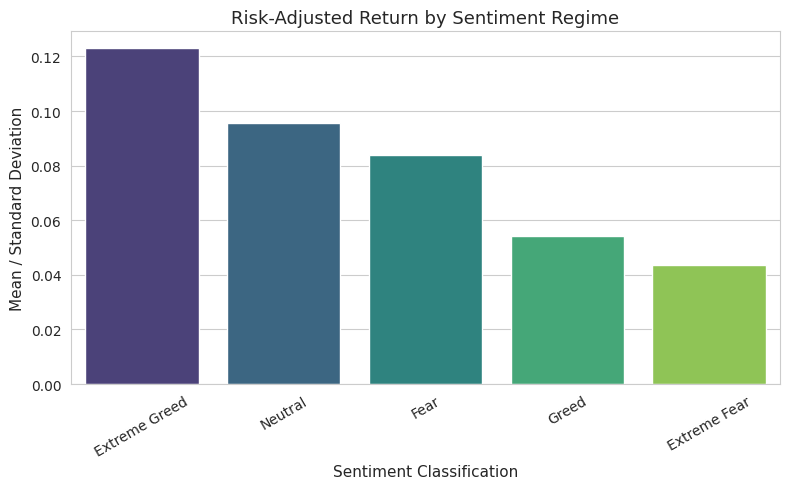

In [42]:
plt.figure()

stats_sorted = stats.sort_values(by='risk_adj', ascending=False)

sns.barplot(
    x=stats_sorted.index,
    y=stats_sorted['risk_adj'],
    palette="viridis"
)

plt.title("Risk-Adjusted Return by Sentiment Regime")
plt.ylabel("Mean / Standard Deviation")
plt.xlabel("Sentiment Classification")
plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig("outputs/charts/risk_adjusted_return.png", dpi=300)
plt.show()


# **Win Rate Chart**

/tmp/ipython-input-4076951566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


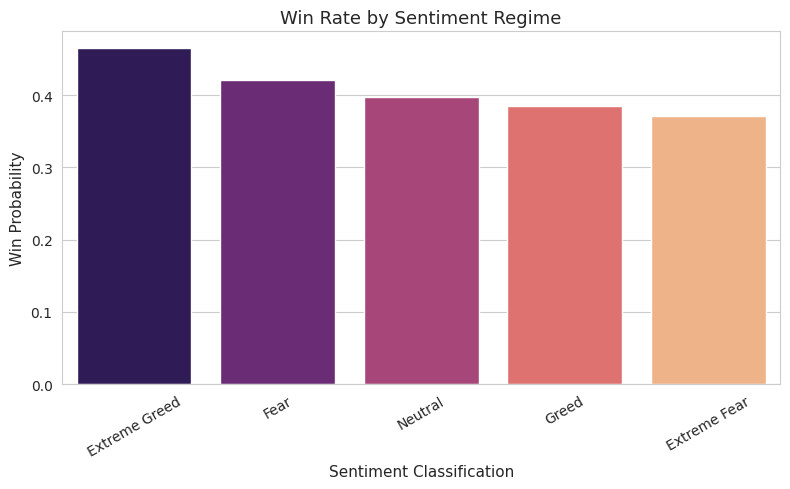

In [43]:
win_rate = df.groupby('classification')['win'].mean().sort_values(ascending=False)

plt.figure()

sns.barplot(
    x=win_rate.index,
    y=win_rate.values,
    palette="magma"
)

plt.title("Win Rate by Sentiment Regime")
plt.ylabel("Win Probability")
plt.xlabel("Sentiment Classification")
plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig("outputs/charts/win_rate.png", dpi=300)
plt.show()


# **Average Position Size (Risk Behavior)**

/tmp/ipython-input-2144898020.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


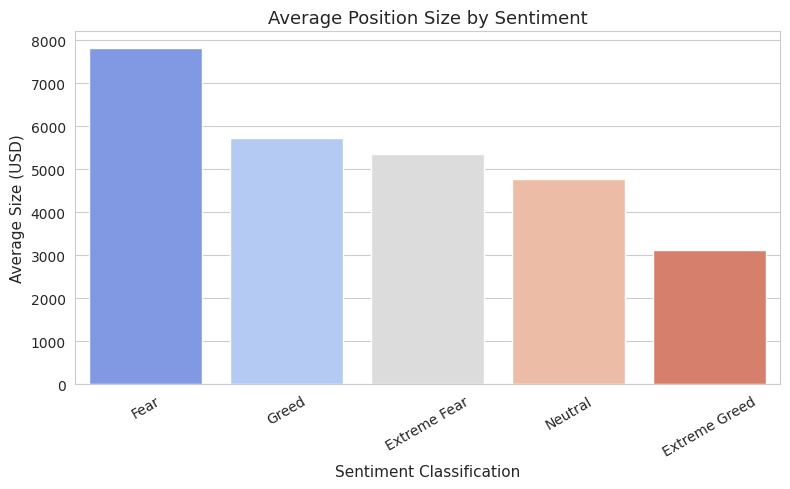

In [44]:
size_usd = df.groupby('classification')['Size USD'].mean().sort_values(ascending=False)

plt.figure()

sns.barplot(
    x=size_usd.index,
    y=size_usd.values,
    palette="coolwarm"
)

plt.title("Average Position Size by Sentiment")
plt.ylabel("Average Size (USD)")
plt.xlabel("Sentiment Classification")
plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig("outputs/charts/avg_position_size.png", dpi=300)
plt.show()


## ⚠ Limitations

- Risk-adjusted return is a simplified Sharpe-like metric (no risk-free rate).
- Analysis does not control for coin-specific effects.
- Zero-PnL trades may include partial closes and internal adjustments.
- Results are observational and do not imply causation.


# 🏁 Final Conclusion

Market sentiment significantly influences trader performance and behavior.

Extreme Greed regimes provide the highest profitability and best risk-adjusted efficiency.
Fear regimes encourage higher trading activity and larger position sizing.
Extreme Fear shows elevated volatility but weaker efficiency.

These findings suggest that momentum-driven environments offer superior trading conditions compared to panic-driven markets.
